In [44]:
import pandas as pd
com = pd.read_csv('景点.csv')
com = com.drop(['标题链接','图片','bookbtn1','评分','rate','add','图片1','标记','时间'],axis=1)
com = com.dropna().reset_index().drop('index',axis=1)
com

标题    类型                                                 描述
0      秦始皇帝陵博物院（兵马俑）  历史人文  又遇好人[强][强] 我是汉中来西安的游客。今日去西安项王营游玩，将手机遗失在景区。遇好人，...
1      秦始皇帝陵博物院（兵马俑）  历史人文  秦始皇兵马俑博物馆门票贵一点，为了加强对中国历史成就，够要给更多人了解和学习，做为爱国主义教...
2      秦始皇帝陵博物院（兵马俑）  历史人文                                      表示看不懂 就是吃的地方多
3      秦始皇帝陵博物院（兵马俑）  历史人文                                              相当震撼啊
4      秦始皇帝陵博物院（兵马俑）  历史人文                                            没去成无法点评
...              ...   ...                                                ...
63079      汉阴凤堰古梯田景区  自然生态                                    在漩涡镇是这样吃的，很美味吧。
63080      汉阴凤堰古梯田景区  自然生态                 地方不错，值得去看看，春天有春天的景色，夏天有夏天的景色，冬天更美。
63081      汉阴凤堰古梯田景区  自然生态                                值得，凤堰梯天好似天阶，令人赏心悦目。
63082      汉阴凤堰古梯田景区  自然生态             是很具陕南梯田风光的象征，适宜在金秋世界休闲游，也适宜在春天油菜花开的季节。
63083      汉阴凤堰古梯田景区  自然生态                             风景优美，值得自驾。和擂鼓台在一条旅游路线上

[63084 rows x 3 columns]

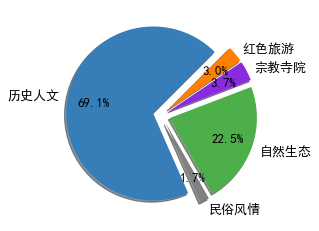

In [39]:
count=com.groupby('类型').count().reset_index()
import matplotlib as mpl
import matplotlib.pyplot as plt

# 防止乱码
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"]=13#设置字体大小
labels = "历史人文","民俗风情","自然生态","宗教寺院","红色旅游"

students = [43452/63084,1056/63084,14172/63084,2315/63084,1899/63084]
colors = ["#377eb8","#808080","#4daf4a","#8A2BE2","#ff7f00"]

explode = (0.1,0.1,0.1,0.1,0.1)

# 绘制图形
plt.pie(students,explode=explode,
        labels = labels,
        autopct="%3.1f%%",
        startangle=45,
        shadow=True,
        colors=colors,
       pctdistance=0.7)
plt.savefig('class.pdf',dpi=300)

In [30]:
import numpy as np
df=com.groupby('标题').count()
df=df.reset_index()
hot = df.sort_values(by='描述',ascending=False)
hot

标题     类型     描述
136  秦始皇帝陵博物院（兵马俑）  13598  13598
158         西安城墙景区   6882   6882
184        陕西历史博物馆   4590   4590
63         华山风景名胜区   4546   4546
64             华清宫   3167   3167
..             ...    ...    ...
22            ?清凉山      1      1
25            ?红石峡      1      1
26          ?茂陵博物馆      1      1
27          ?药王山景区      1      1
149         药王谷风景区      1      1

[199 rows x 3 columns]

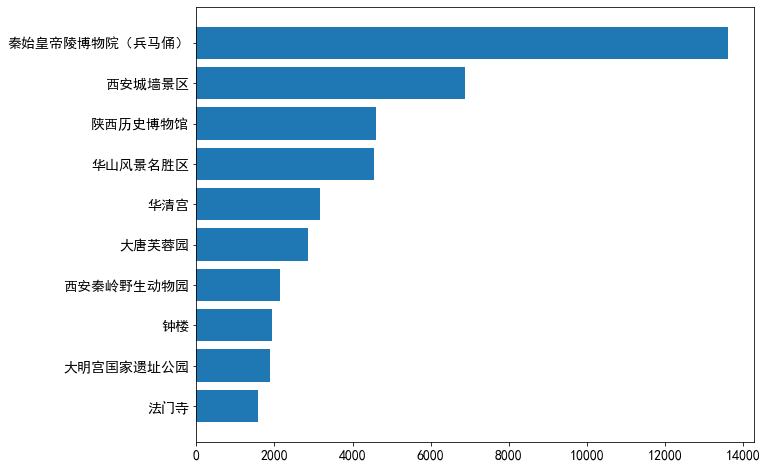

In [59]:
import matplotlib.pyplot as plt

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"]=14#设置字体大小

spots = hot.iloc[:10,0][::-1]
com_number = hot.iloc[:10,1][::-1]

plt.figure(figsize=(10,8))
plt.barh(spots, com_number)  # 横放条形图函数 barh
#plt.title('景区评论数前十排名')
plt.savefig("pic/rank.png",bbox_inches='tight')
plt.show()


In [116]:
import re
df = com.copy()
df.columns=['spot','txt']

for i in range(1,len(df2)):
    df.txt[i]=df.txt[i].replace(" ","")
    df.txt[i]=df.txt[i].replace("[","")
    df.txt[i]=df.txt[i].replace("]","")
    #去掉非汉字的所有字符
    df.txt[i] = re.sub('([^\u4e00-\u9fa5\u0030-\u0039])', '', df.txt[i])

In [14]:
import pandas as pd
df = pd.read_csv('景点(无特殊字符).csv')
for i in range(len(df)):
    try:
        tmpstr=df.txt[i]
        df.txt[i]=[w for w in jieba.cut(tmpstr) if w not in list(stop_word.w)]
    except:
        pass

In [15]:
df

spot                                                txt
0      秦始皇帝陵博物院（兵马俑）  [遇, 好人, 强, 强,  , 汉中, 西安, 游客, 今日, 西安, 项王, 营, 游玩...
1      秦始皇帝陵博物院（兵马俑）  [秦始皇, 兵马俑博物馆, 贵, 一点, 中国, 历史, 成就, 够, 学习, 做, 爱国主...
2      秦始皇帝陵博物院（兵马俑）                                           [看不懂, 吃]
3      秦始皇帝陵博物院（兵马俑）                                               [震撼]
4      秦始皇帝陵博物院（兵马俑）                                        [没去, 成, 点评]
...              ...                                                ...
63079      汉阴凤堰古梯田景区                                     [漩涡, 镇, 吃, 美味]
63080      汉阴凤堰古梯田景区               [值得, 春天, 春天, 景色, 夏天, 夏天, 景色, 冬天, 更美]
63081      汉阴凤堰古梯田景区                     [值得, 凤堰梯, 天, 好似, 天阶, 令人, 赏心悦目]
63082      汉阴凤堰古梯田景区  [具, 陕南, 梯田, 风光, 象征, 适宜, 金秋, 时节, 休闲游, 适宜, 春天, 油...
63083      汉阴凤堰古梯田景区                    [风景优美, 值得, 自驾, 擂鼓台, 一条, 旅游, 路线]

[63084 rows x 2 columns]

In [3]:
import jieba

tmpstr=df.loc[63082,'txt']
res = jieba.cut(tmpstr) # 默认精确模式

res # 是一个可迭代的generator,可以使用for循环遍历，类似list
'/'.join(res)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YANGZH~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.119 seconds.
Prefix dict has been built successfully.


'是/很/具/陕南/梯田/风光/的/象征/适宜/在/金秋/时节/休闲游/也/适宜/在/春天/油菜花/开/的/季节'

In [4]:
stop_word = pd.read_csv('停用词.csv',names=['w'],sep='\t',encoding='utf-8')
l=[w for w in jieba.cut(tmpstr) if w not in list(stop_word.w)]
for i in l:
    print(i,end='/')

具/陕南/梯田/风光/象征/适宜/金秋/时节/休闲游/适宜/春天/油菜花/开/季节/

In [5]:
import jieba.posseg as psg
#词性标注
for item in psg.cut(tmpstr):
    print(item.word, item.flag) # x未分辨词性，c连词

是 v
很 d
具 v
陕南 ns
梯田 n
风光 n
的 uj
象征 v
适宜 a
在 p
金秋 nr
时节 n
休闲游 v
也 d
适宜 a
在 p
春天 t
油菜花 n
开 v
的 uj
季节 n


In [8]:
import jieba.posseg as pseg
text = tmpstr
words = pseg.cut(text)
filtered_words = []
for word, flag in words:
    if flag in ['n', 'v', 'vn', 'a']:
        filtered_words.append(word)
'/'.join(filtered_words)

'是/具/梯田/风光/象征/适宜/时节/休闲游/适宜/油菜花/开/季节'

In [113]:
(df.txt).to_csv('评论文本.txt',index=False,header=None)

In [20]:
df=df.dropna().reset_index().drop('index',axis=1)
df

spot                                                txt
0      秦始皇帝陵博物院（兵马俑）  [遇, 好人, 强, 强,  , 汉中, 西安, 游客, 今日, 西安, 项王, 营, 游玩...
1      秦始皇帝陵博物院（兵马俑）  [秦始皇, 兵马俑博物馆, 贵, 一点, 中国, 历史, 成就, 够, 学习, 做, 爱国主...
2      秦始皇帝陵博物院（兵马俑）                                           [看不懂, 吃]
3      秦始皇帝陵博物院（兵马俑）                                               [震撼]
4      秦始皇帝陵博物院（兵马俑）                                        [没去, 成, 点评]
...              ...                                                ...
62899      汉阴凤堰古梯田景区                                     [漩涡, 镇, 吃, 美味]
62900      汉阴凤堰古梯田景区               [值得, 春天, 春天, 景色, 夏天, 夏天, 景色, 冬天, 更美]
62901      汉阴凤堰古梯田景区                     [值得, 凤堰梯, 天, 好似, 天阶, 令人, 赏心悦目]
62902      汉阴凤堰古梯田景区  [具, 陕南, 梯田, 风光, 象征, 适宜, 金秋, 时节, 休闲游, 适宜, 春天, 油...
62903      汉阴凤堰古梯田景区                    [风景优美, 值得, 自驾, 擂鼓台, 一条, 旅游, 路线]

[62904 rows x 2 columns]

In [45]:
df=com.dropna().reset_index().drop('index',axis=1)
df

标题    类型                                                 描述
0      秦始皇帝陵博物院（兵马俑）  历史人文  又遇好人[强][强] 我是汉中来西安的游客。今日去西安项王营游玩，将手机遗失在景区。遇好人，...
1      秦始皇帝陵博物院（兵马俑）  历史人文  秦始皇兵马俑博物馆门票贵一点，为了加强对中国历史成就，够要给更多人了解和学习，做为爱国主义教...
2      秦始皇帝陵博物院（兵马俑）  历史人文                                      表示看不懂 就是吃的地方多
3      秦始皇帝陵博物院（兵马俑）  历史人文                                              相当震撼啊
4      秦始皇帝陵博物院（兵马俑）  历史人文                                            没去成无法点评
...              ...   ...                                                ...
63079      汉阴凤堰古梯田景区  自然生态                                    在漩涡镇是这样吃的，很美味吧。
63080      汉阴凤堰古梯田景区  自然生态                 地方不错，值得去看看，春天有春天的景色，夏天有夏天的景色，冬天更美。
63081      汉阴凤堰古梯田景区  自然生态                                值得，凤堰梯天好似天阶，令人赏心悦目。
63082      汉阴凤堰古梯田景区  自然生态             是很具陕南梯田风光的象征，适宜在金秋世界休闲游，也适宜在春天油菜花开的季节。
63083      汉阴凤堰古梯田景区  自然生态                             风景优美，值得自驾。和擂鼓台在一条旅游路线上

[63084 rows x 3 columns]

In [46]:
gp=df[df['标题']=='秦始皇帝陵博物院（兵马俑）']['描述'].sum()
gp

'又遇好人[强][强] 我是汉中来西安的游客。今日去西安项王营游玩，将手机遗失在景区。遇好人，景区工作人员小王同志捡到，完壁归赵。借此平台特再次向小王致谢！向你致敬！向你学习！向你看齐！[玫瑰][玫瑰][强][强]\ue41d\ue41d秦始皇兵马俑博物馆门票贵一点，为了加强对中国历史成就，够要给更多人了解和学习，做为爱国主义教育基地更要向全国人民开放，使更多的人受益！表示看不懂 就是吃的地方多相当震撼啊没去成无法点评方便快捷。来西安必须要去的景点，虽然过程很快但是很震撼世界八大奇迹，虽然是人财两耗的大工程，但其历史价值就是无价！留给了后人伟大的财富！中国人的智慧，勤劳，技术，思想，领先世界几千年！中华民族伟大复兴在即！加油中国！很好，服务及时满意！满意！乐乐热情大方！乐乐服务周到，非常贴心！兵马俑震撼人心！服务很好，讲解深刻，到位，人很好，秦始皇兵马俑介绍非常详细。乐乐棒棒哒乐乐热情大方，旅途很愉快，开心！开心！开心！可以可以可以可以可以可以直通车很方便，对乐乐的服务很满意乐乐的服务很好，讲解细致认真，好评张乐乐小姐姐很热情，不光讲解到位，还推荐了很多西安当地好吃的好玩的，很好的一次体验直达车很方便，解说mm很热情服务满意.兵马俑很不错很好玩的地方！第一次来西安，第一站肯定去看秦兵马俑和华清池，看了妖猫传，杨玉环和玄宗的爱情是那么的美好，希望下次有空去泡一下西安的温泉，感受一下。在俑坑里2000年多前的士兵车马气势逼人，仿佛看到了秦王一扫**的霸气场面，可惜主陵墓还没有挖掘。有生之年能看到里面吧！博物馆共分为(一、二、三号坑、铜车马展厅)，一号坑是兵马俑规模最大的坑，也是最可以感受到兵马俑军团作为一大奇迹，令人感到无比震撼的地方。在这里我们能看见原样陈列的庞大步兵**，可惜没有看到彩俑。导游刘萌讲解的比较详细，来西安可以找她哦！好了今天就这样，去吃肉夹馍了！导游刘萌小姐姐讲解的更专业，敬**的车技很好，玩的好开心哦周大福导游安排的行程很满意，司机**车开的很稳！没看到表演很遗憾。也是一定要请讲解要不然只看到一堆泥娃娃秦哥唐妹，服务特别棒。建议老板加工资。真的很赞，物超所值。不虚此行，秦始皇兵马俑 ，感受历史的厚重 文化的传承 古人的智慧 ?。谢谢导游精心的安排与讲解很壮观，需要导游哦不虚此行！导游讲解特别好，票价包含门票大巴往返以及景区讲解还送了荆轲刺秦王的演出，

In [3]:
import pandas as pd
import jieba
stop_word = pd.read_csv('停用词.csv',names=['w'],sep='\t',encoding='utf-8')

gp = open("评论文本.txt",encoding='utf-8').read()
gp = gp.replace('\n','')
gp = gp.replace(' ','')
word_list = [w for w in jieba.cut(gp) if w not in list(stop_word.w)] # 去除停用词

# 转为数据框，方便统计词频
df = pd.DataFrame(word_list, columns = ['word'])
#df.head()

result = df.groupby(['word']).size()
# print(result)
freqlist = result.sort_values(ascending=False) # 降序
freqlist[:20]

word
值得     8521
西安     6951
历史     6130
导游     5343
城墙     4321
兵马俑    3525
博物馆    2967
景色     2958
震撼     2766
小时     2626
华山     2607
排队     2350
携程     2255
风景     2234
感受     2124
晚上     2120
体验     2119
坐      2099
表演     2090
喜欢     2043
dtype: int64

In [47]:
import jieba
stop_word = pd.read_csv('停用词.csv',names=['w'],sep='\t',encoding='utf-8')
word_list = [w for w in jieba.cut(gp) if w not in list(stop_word.w)] # 去除停用词

# 转为数据框，方便统计词频
df = pd.DataFrame(word_list, columns = ['word'])
#df.head()

result = df.groupby(['word']).size()
# print(result)
freqlist = result.sort_values(ascending=False) # 降序
freqlist[:20]

word
       5026
*      4907
导游     3173
兵马俑    3073
震撼     1903
历史     1601
值得     1560
西安     1345
坑      1177
…       981
壮观      970
身份证     832
奇迹      775
世界      722
秦始皇     664
请       646
刷       584
体验      560
讲解员     554
携程      538
dtype: int64

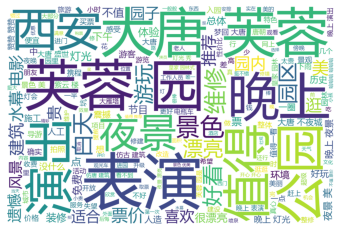

In [26]:
# 生成初始词云
import wordcloud
import matplotlib.pyplot as plt
myfont = r'C:\Windows\Fonts\Microsoft YaHei UI\msyh' # 指定字体，默认字体不支持中文
cloudobj = wordcloud.WordCloud(font_path=myfont,
                              width=1200,height=800,
                              background_color="white",
                              stopwords=stop_word).generate(' '.join(word_list))
plt.imshow(cloudobj)
plt.axis("off")
plt.show()
cloudobj.to_file('词云2.png')

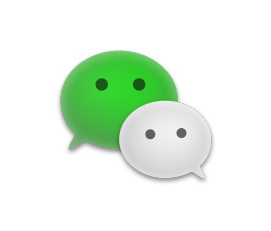

In [35]:
# 背景图片展示
from PIL import Image

img = Image.open('pic/wechat2.png')
plt.imshow(img)
plt.axis("off")
plt.show()

In [37]:
# 生成对象
import wordcloud
import numpy as np
img = Image.open('pic/wechat2.png') # 打开遮罩图片
mask = np.array(img) #将图片转换为数组
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [38]:
#3.将参数mask设值为：mask
wordcloud = wordcloud.WordCloud(background_color='white',max_words=10000,font_path="C:/Windows/Fonts/simkai.ttf",
                      stopwords=stop_word,mask=mask,colormap='Spectral').generate(word_list)
# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')# 用plt显示图片
plt.axis("off")  # 不显示坐标轴

wordcloud.to_file('pic/fry2.png')
plt.show() # 显示图片

TypeError: expected string or bytes-like object

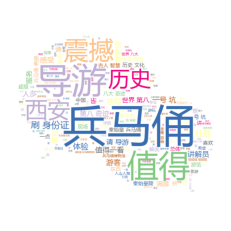

In [50]:
from imageio import imread
import wordcloud
imgobj = imread('pic/wechat3.png')

cloudobj = wordcloud.WordCloud(font_path=myfont,
                               mask = imread('pic/wechat3.png'),
                               background_color="white",
                               stopwords=stop_word,colormap='Accent').generate(' '.join(word_list))

#image_colors = wordcloud.ImageColorGenerator(np.array(imgobj))
#cloudobj.recolor(color_func=image_colors)

plt.imshow(cloudobj)
plt.axis("off")
plt.show()
cloudobj.to_file('pic/bmy2.png')

In [169]:
cloudobj.to_file('pic/词云3.png')

In [172]:
' '.join(word_list)

'遇 好人 强 强 汉中 西安 游客 今日 西安 项王 营 游玩 手机 遗失在 景区 遇 好人 景区 工作人员 小王 同志 捡 完壁 赵 平台 特 向小王 致谢 致敬 学习 看齐 玫瑰 玫瑰 强 强 \ue41d \ue41d 秦始皇 兵马俑博物馆 门票 贵 一点 中国 历史 成就 够 更 学习 做 爱国主义 教育 基地 更要 全国 开放 更 受益 看不懂 吃 震撼 成 点评 方便快捷 西安 景点 过程 很快 震撼 世界 八大 奇迹 财两耗 工程 历史 价值 无价 留给 后人 财富 中国 智慧 勤劳 技术 思想 领先 世界 几千年 中华民族 复兴 加油 中国 服务 满意 满意 乐乐 热情 大方 乐乐 服务周到 贴心 兵马俑 震撼人心 服务 讲解 深刻 到位 秦始皇 兵马俑 介绍 详细 乐乐 棒棒 哒 乐乐 热情 大方 旅途 愉快 开心 开心 开心 直通车 乐乐 服务 满意 乐乐 服务 讲解 细致 好评 张 乐乐 小姐姐 热情 讲解 到位 推荐 西安 好吃 好玩 体验 直达车 解说 热情服务 满意 兵马俑 不错 好玩 第一次 西安 第一站 肯定 秦兵马俑 华清池 妖 猫 传 杨玉环 玄宗 爱情 美好 希望 下次 有空 泡 西安 温泉 感受一下 俑坑 里 2000 年 前 士兵 车马 气势 逼人 仿佛 秦王 一扫 霸气 场面 可惜 主 陵墓 挖掘 有生之年 博物馆 共 分为 一二三 号 坑 铜车马 展厅 一号 坑 兵马俑 规模 坑 感受 兵马俑 军团 一大 奇迹 令人 感到 无比 震撼 原样 陈列 庞大 步兵 可惜 彩俑 导游 刘萌 讲解 详细 西安 找 吃 肉夹馍 导游 刘萌 小姐姐 讲解 更 专业 敬 车技 好玩 好开心 周大福 导游 安排 行程 满意 司机 车开 稳 表演 遗憾 请 讲解 一堆 泥娃娃 秦哥 唐妹 服务 特别 棒 建议 老板 加工资 很赞 物超所值 不虚此行 秦始皇 兵马俑 感受 历史 厚重 文化 传承 古人 智慧 谢谢 导游 精心 安排 讲解 壮观 导游 不虚此行 导游 讲解 特别 票价 包含 门票 大巴 往返 景区 讲解 送 荆轲 刺秦王 演出 导游 推荐 秦俑情 舞台剧 灯光 不错 震撼 购票 便捷 刷 身份证 唯一 美中不足 再补 门票 喜欢 收藏 门票 旅者 人性化 希望 一点 不错 体验 不错 历史 价值 秦哥 唐妹 讲解 细心 帮人 